# Sandpile Model by Per Bak

Galen J. Wilkerson
gjwilkerson@gmail.com

## A model of avalanches in piles of sand

For more information, see:

Bak, Per. How nature works: the science of self-organized criticality. Springer Science & Business Media, 2013.

Wiesenfeld, Kurt, Chao Tang, and Per Bak. "A physicist's sandbox." Journal of statistical physics 54.5 (1989): 1441-1458.

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

import seaborn as sns
from matplotlib import animation, rc
from IPython.display import HTML

from ipywidgets import *

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

%matplotlib inline

# don't show warnings - nicer output
import warnings
warnings.filterwarnings('ignore')

# display all results, not just last
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



def setup(width, height):
    sandbox = np.zeros([height, width], dtype=int)
    
    return(sandbox)

def topple(sandbox, x, y):
    
    dimensions = sandbox.shape
    
    grains_at_site = sandbox[y,x]
    
    # edge cases
    if (x < dimensions[1] - 1):
        sandbox[y, x+1] += 1
        if sandbox[y, x+1] == topple_height:
            sandbox = topple(sandbox, x+1, y)
    if (x > 0):
        sandbox[y, x-1] += 1
        if sandbox[y, x-1] == topple_height:
            sandbox = topple(sandbox, x-1, y)
    if (y < dimensions[0] - 1):
        sandbox[y+1, x] += 1
        if sandbox[y+1, x] == topple_height:
            sandbox = topple(sandbox, x, y+1)
    if (y > 0):
        sandbox[y-1, x] += 1
        if sandbox[y-1, x] == topple_height:
            sandbox = topple(sandbox, x, y-1)
    
    # reset x
    sandbox[y,x] = 0
    
    return(sandbox)

def run_sandbox(sandbox, number_iterations, width, height, topple_height):
    
    sandbox_at_timestep = []
    sandbox_at_timestep.append(sandbox.copy())
    
    for i in range(number_iterations):

        x = rnd.randint(0, width-1)
        y = rnd.randint(0, height-1)

        sandbox[y, x] += 1
        if sandbox[y, x] == topple_height:
            sandbox = topple(sandbox, x, y)
    
        sandbox_at_timestep.append(sandbox.copy())
    
    return(sandbox_at_timestep)

def plotSand(sandbox_at_timestep, num_iterations, i=0, topple_height=4):
    
    data = sandbox_at_timestep[i]
    sns.heatmap(data, vmax=topple_height, square=True)

    max_grains = max([np.sum(sandbox) for sandbox in sandbox_at_timestep])
    
    num_grains = []
    for j in range(i):
        num_grains.append(sandbox_at_timestep[j].sum())
    
    plt.figure()
    plt.plot(num_grains)
    plt.xlim([0, num_iterations])
    plt.ylim([0, max_grains])
    plt.title("number of grains")
    

def animate(sandbox_at_timestep, width, height, topple_height):

    #fig = plt.figure()
    fig, ax = plt.subplots()

    def init():
        #sns.heatmap(np.zeros((width, height)), vmax=topple_height, square=True)
        pass

    def animate(i):
        plt.clf()
    #    data = np.random.rand(width, height)
        data = sandbox_at_timestep[i]
        
        sns.heatmap(data, vmax=topple_height, square=True)
        
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=number_iterations, repeat = False)
    #return(HTML(anim.to_html5_video()))
    return(anim)

# Control parameters:
# size and number of grains to randomly add to pile

In [127]:
width = 10
height = 10
number_iterations = 1000

# Run the simulation and get the results at each timestep

In [128]:
topple_height = 4 # for now, keep fixed at 4

sandbox = setup(width, height)

sandbox_at_timestep = run_sandbox(sandbox, number_iterations, width, height, topple_height)

# Create an animation of the output (can be very slow)

In [ ]:
animate(sandbox_at_timestep, width, height, topple_height)

# Another way to view the sandpile at each timestep

## Can click slider then push the arrow keys to move slider

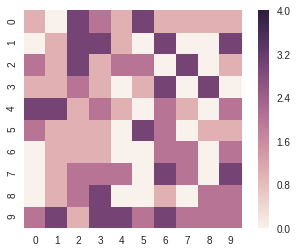

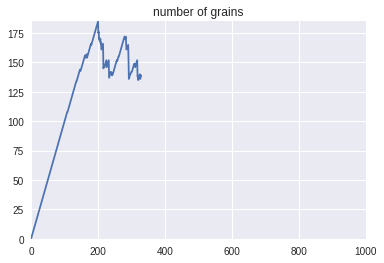

In [130]:
myInteract = interact(plotSand, 
                      sandbox_at_timestep=fixed(sandbox_at_timestep), 
                      topple_height = fixed(topple_height), 
                      i = (0, number_iterations, 1),
                      num_iterations = fixed(number_iterations))

## Just plot the number of grains in the pile over time

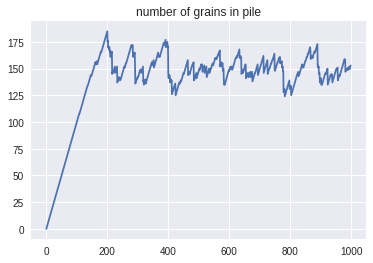

In [133]:
num_grains = []
for i in range(number_iterations - 1):
    num_grains.append(sandbox_at_timestep[i].sum())

plt.plot(num_grains);
plt.title('number of grains in pile');

## We might ask whether this is $1/f$ noise